In [1]:
!pip install seaborn
import h5py
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns
from scipy import stats
import pandas as pd
plt.rcParams['font.size'] = 14
%matplotlib inline

In [2]:
data_parent_dir = './../../../data/'
classification_results = pd.read_csv(data_parent_dir + 'best_result.tsv', sep='\t')
markers = {
    'Eigenmaps': 'v', 
    'LINE-1st': 'o', 
    'LINE-2nd': 'x', 
    'node2vec': 's'
}

linestyles = {
    'Eigenmaps': '-.', 
    'LINE-1st': '--', 
    'LINE-2nd': '-', 
    'node2vec': ':'
}

colors = {
    'Eigenmaps': '#1f77b4', 
    'LINE-1st': '#ff7f0e', 
    'LINE-2nd': '#2ca02c', 
    'node2vec': '#000000'
}
classification_results.dropna(inplace=True) # remove eigenmaps result of flicker

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


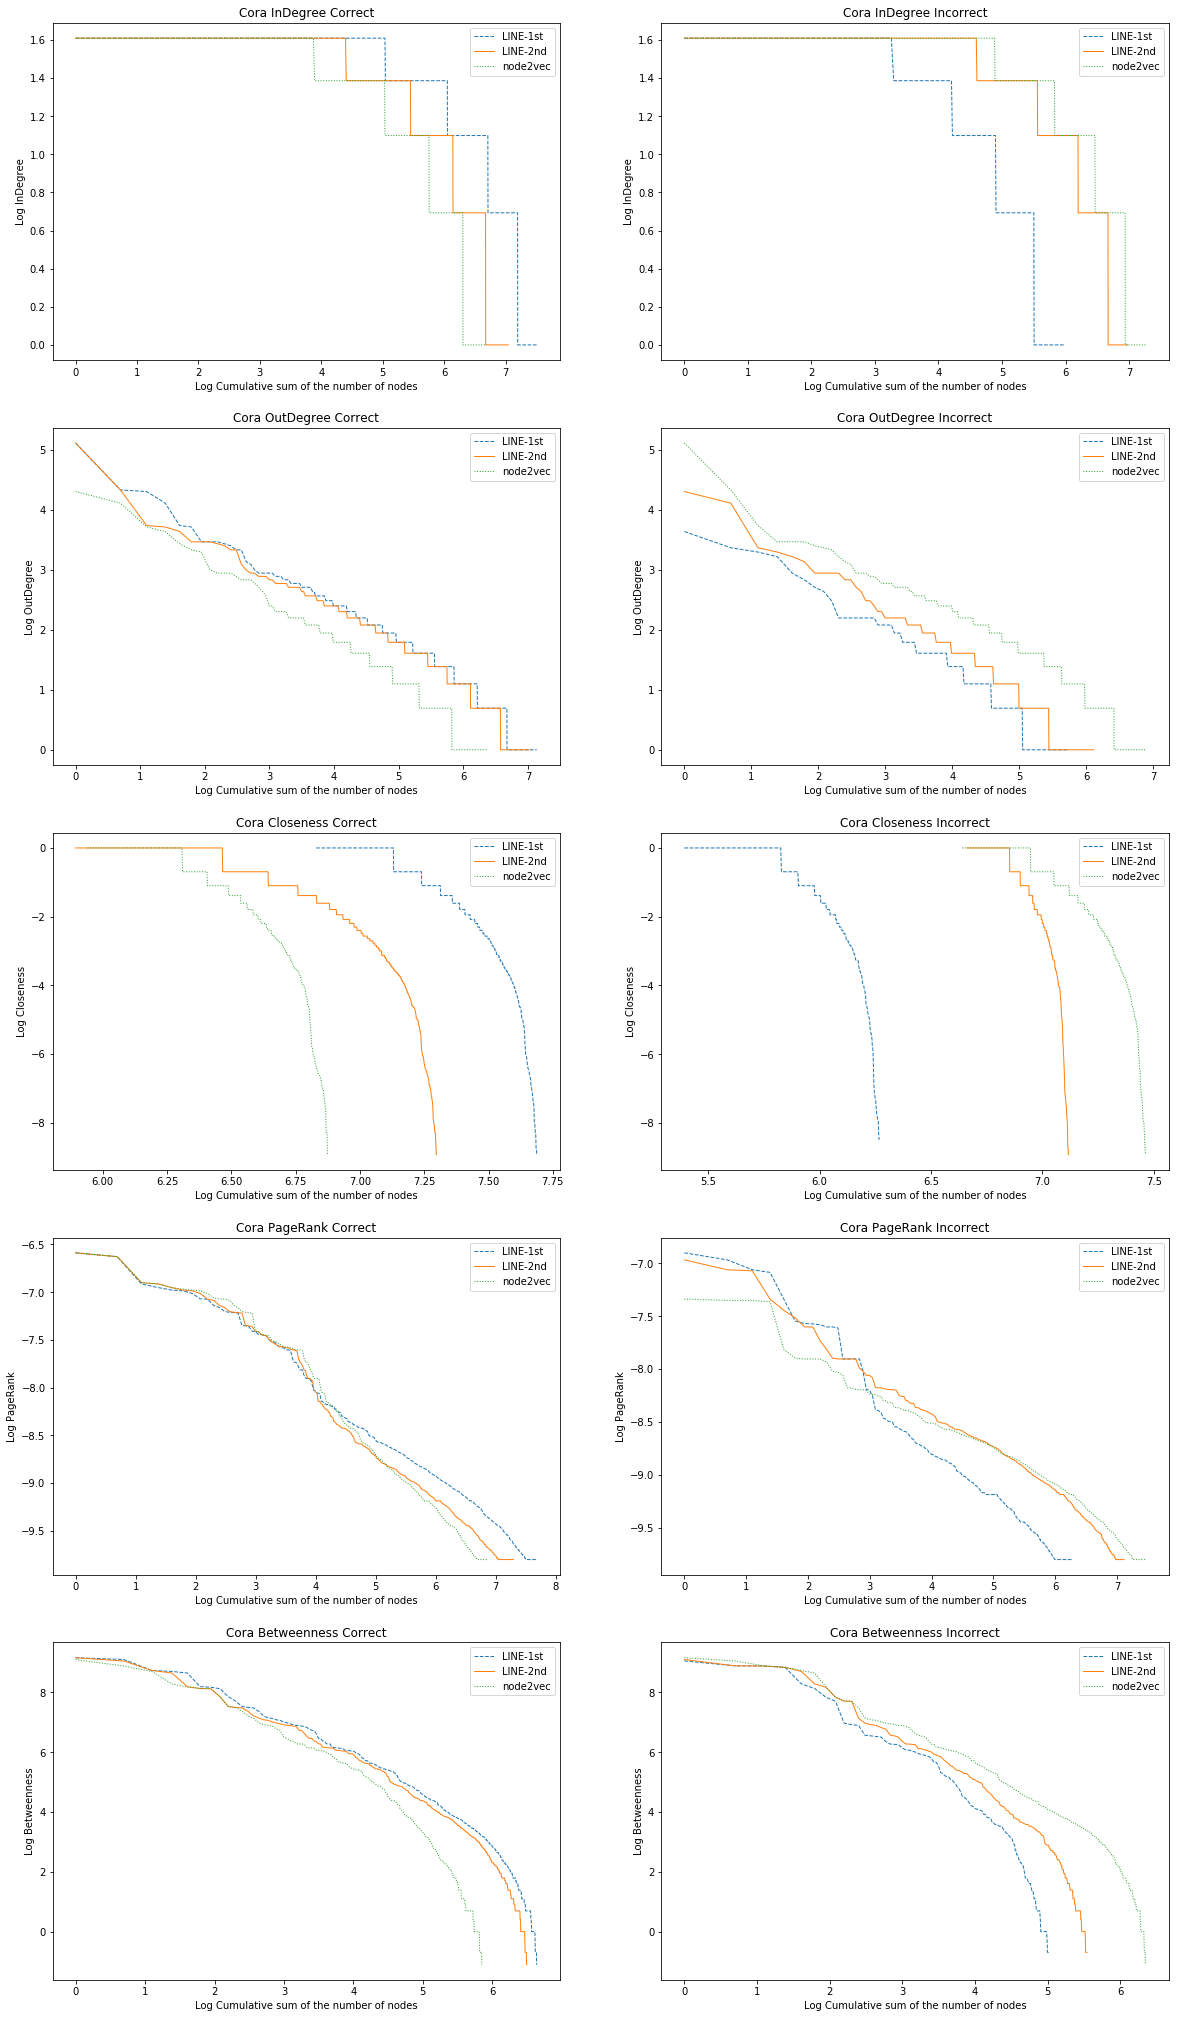

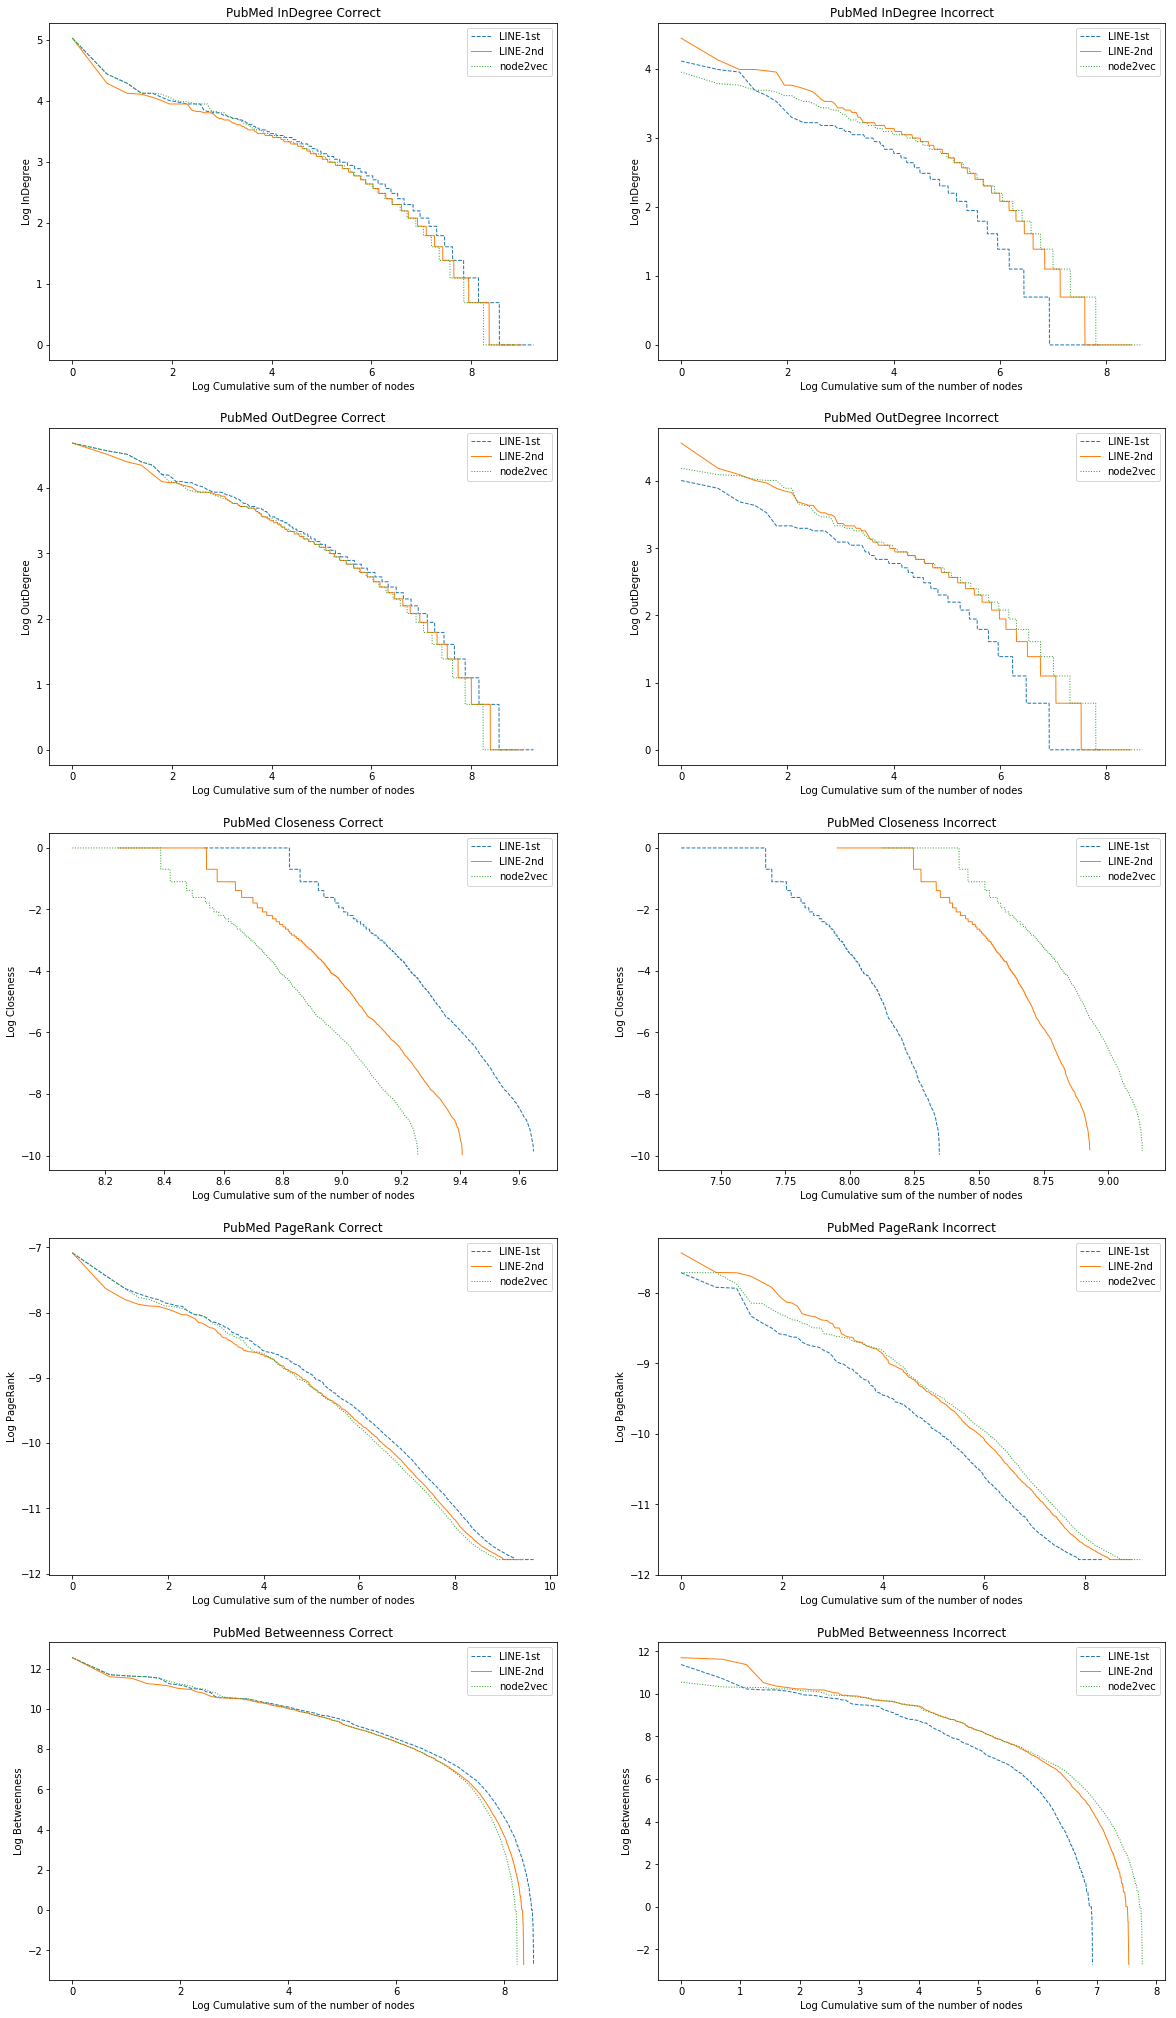

In [3]:
property_names = ['unnormalized_in_degree', 'unnormalized_out_degree', 'unnormalized_closeness', 'pagerank', 'unnormalized_betweenness']
dnames = ['Cora', 'PubMed']
for dname in dnames:
    result_df = classification_results[(classification_results['dataset'] == dname)]
    data_dir = data_parent_dir + dname + '/'     

    # read node properties
    df = pd.read_csv(data_dir + 'node_feature.csv.as_directed')
    num_nodes = len(df)
    fig, axes = plt.subplots(nrows=len(property_names), ncols=2, figsize=(20, 36))

    for r, property_name in enumerate(property_names):
        x = df[property_name].values
        all_values = np.log(x)

        if property_name == 'pagerank':
            property_name = 'PageRank'
        elif 'in' in property_name:
            property_name = 'InDegree'
        elif 'out' in property_name:
            property_name = 'OutDegree'
        else:
            property_name = property_name.split('_')[1].capitalize()        

        for _, record in result_df.iterrows():
            param = record['param']
            model = record['model']
            
            incorrect_nodes = np.array(list(map(int, record['incorrect_ids'].split())))
            correct_nodes = np.array([node_id for node_id in np.arange(num_nodes) if node_id not in incorrect_nodes])
            correct_and_incorrect_dict = {'Correct': correct_nodes, 'Incorrect': incorrect_nodes}
            
            for c, (label, nodes) in enumerate(correct_and_incorrect_dict.items()):
                x = np.log(np.arange(len(nodes)) + 1)
                y = sorted(all_values[nodes], reverse=True)
                axes[r, c].plot(x, y, label=model, linewidth=1, 
                                linestyle=linestyles[model], 
                               )
                axes[r, c].set_title(dname + ' ' + property_name + ' ' + label)
                axes[r, c].set_xlabel('Log Cumulative sum of the number of nodes')
                axes[r, c].set_ylabel('Log {}'.format(property_name))
                axes[r, c].legend()
        
    plt.show()
    
    print('\n'*7)

# Undirected Graphs

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log


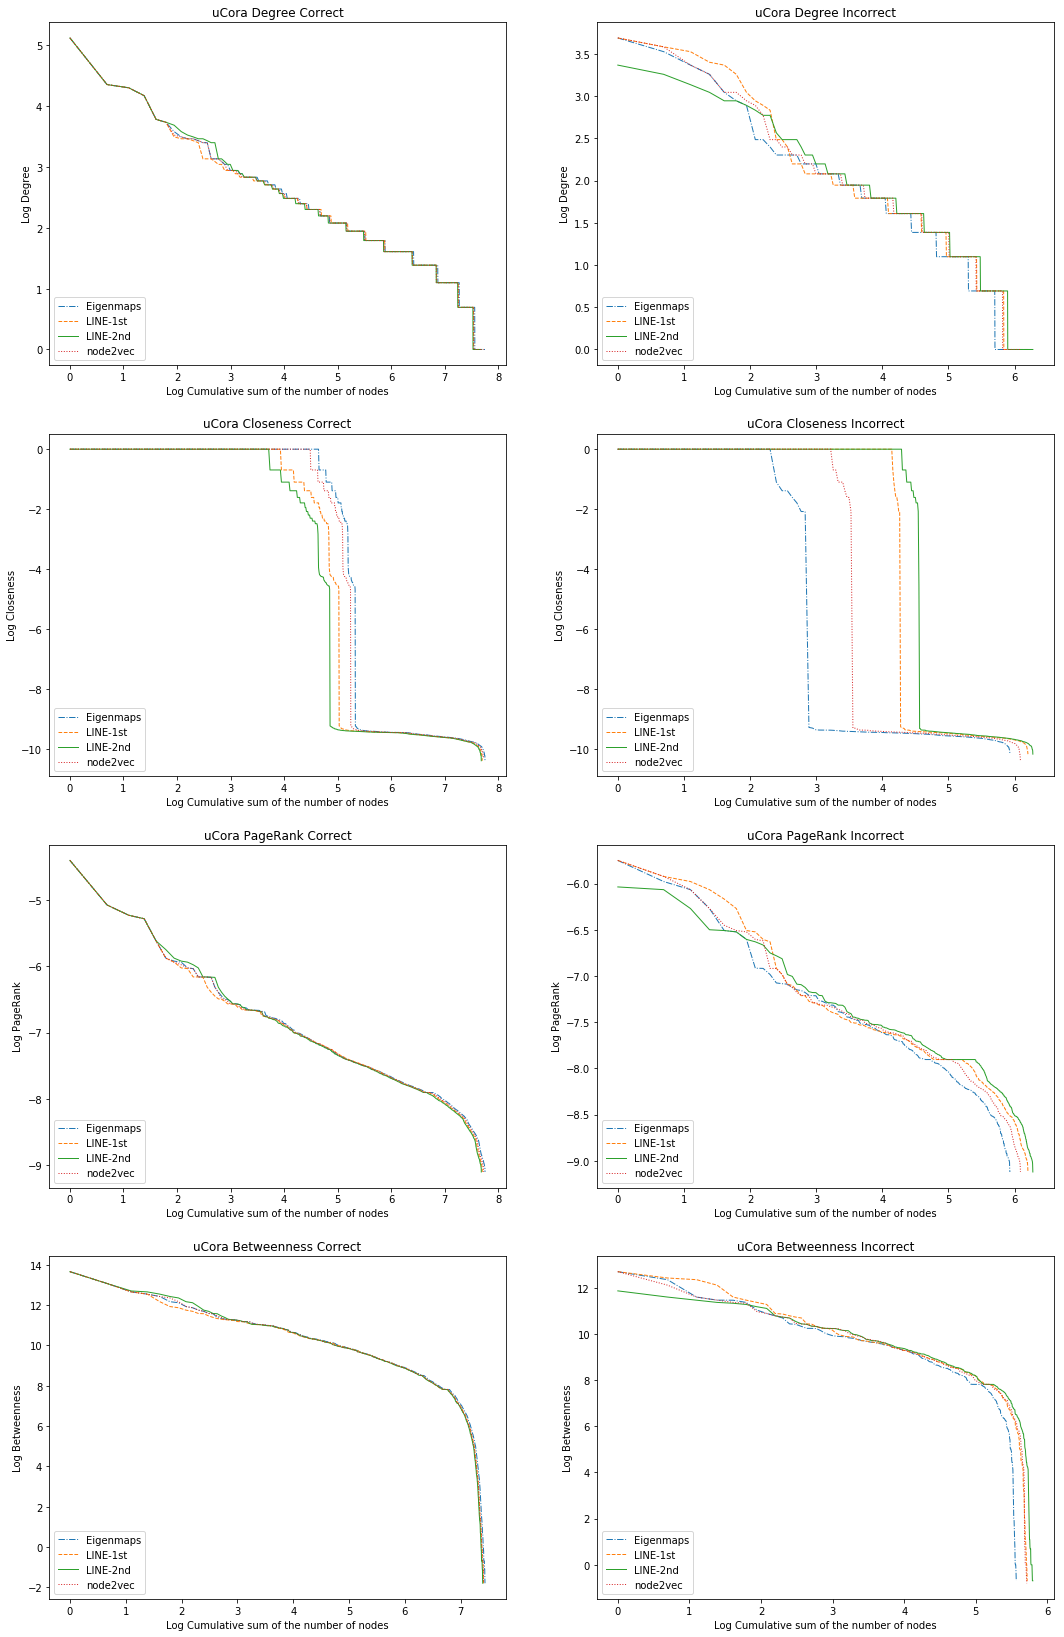

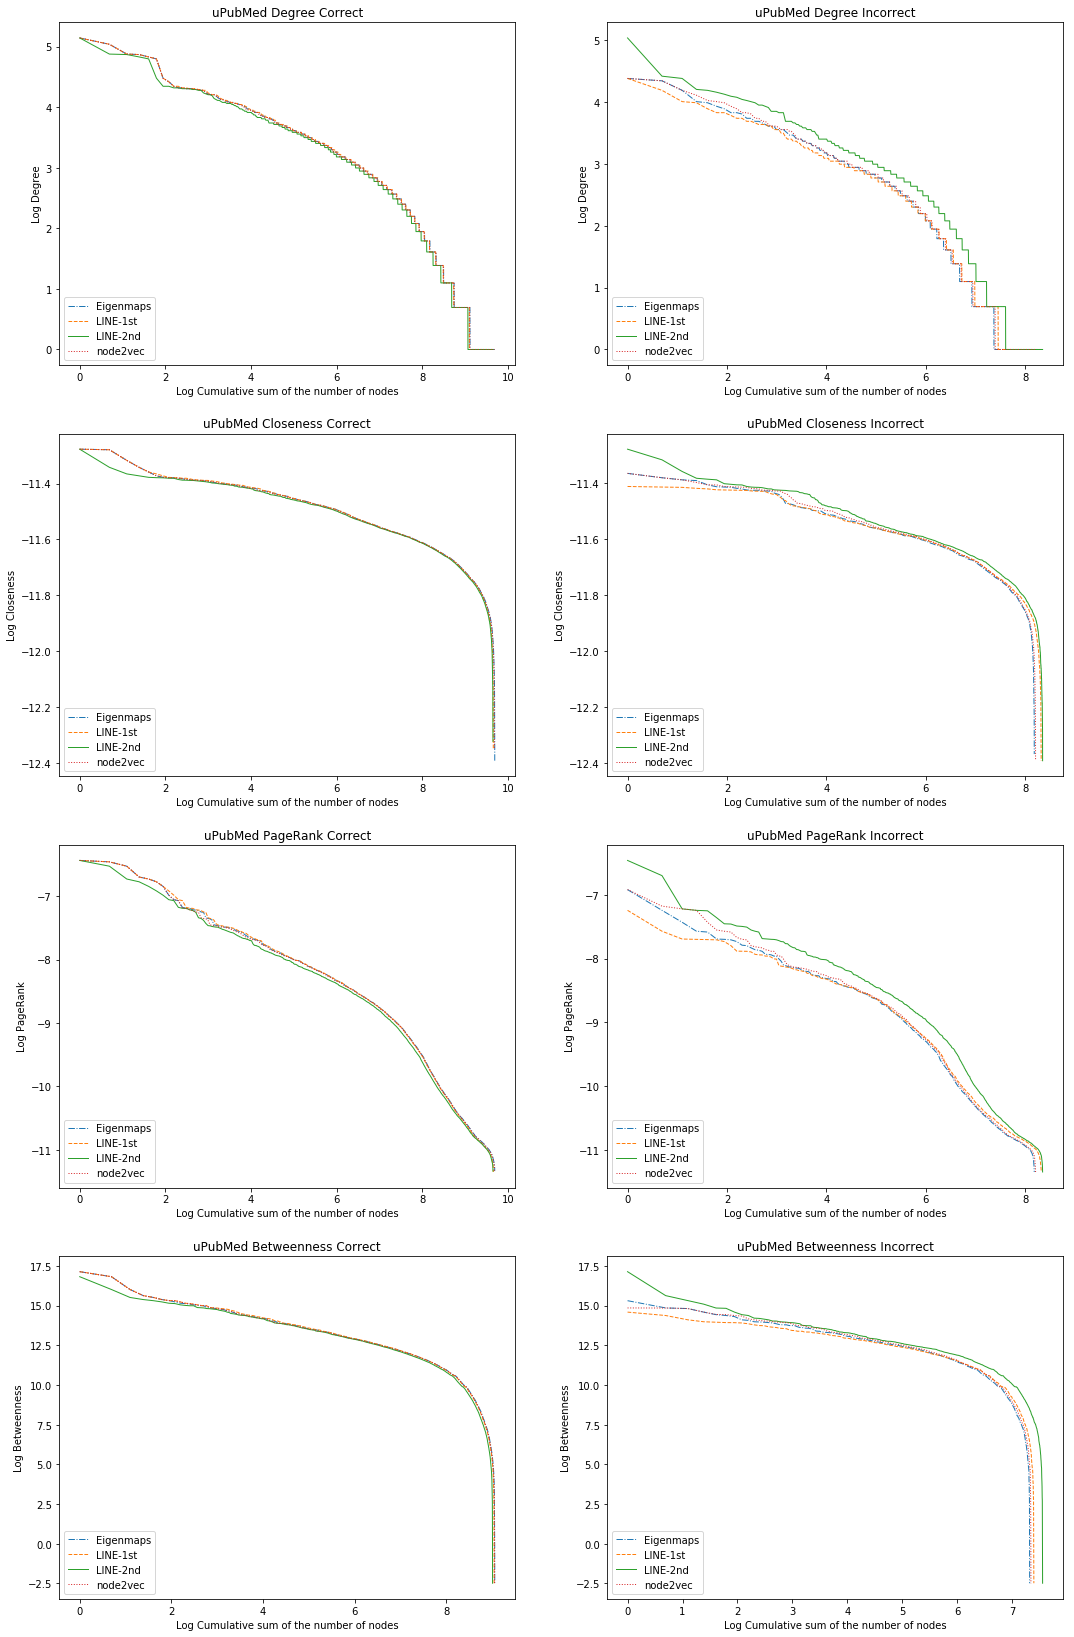

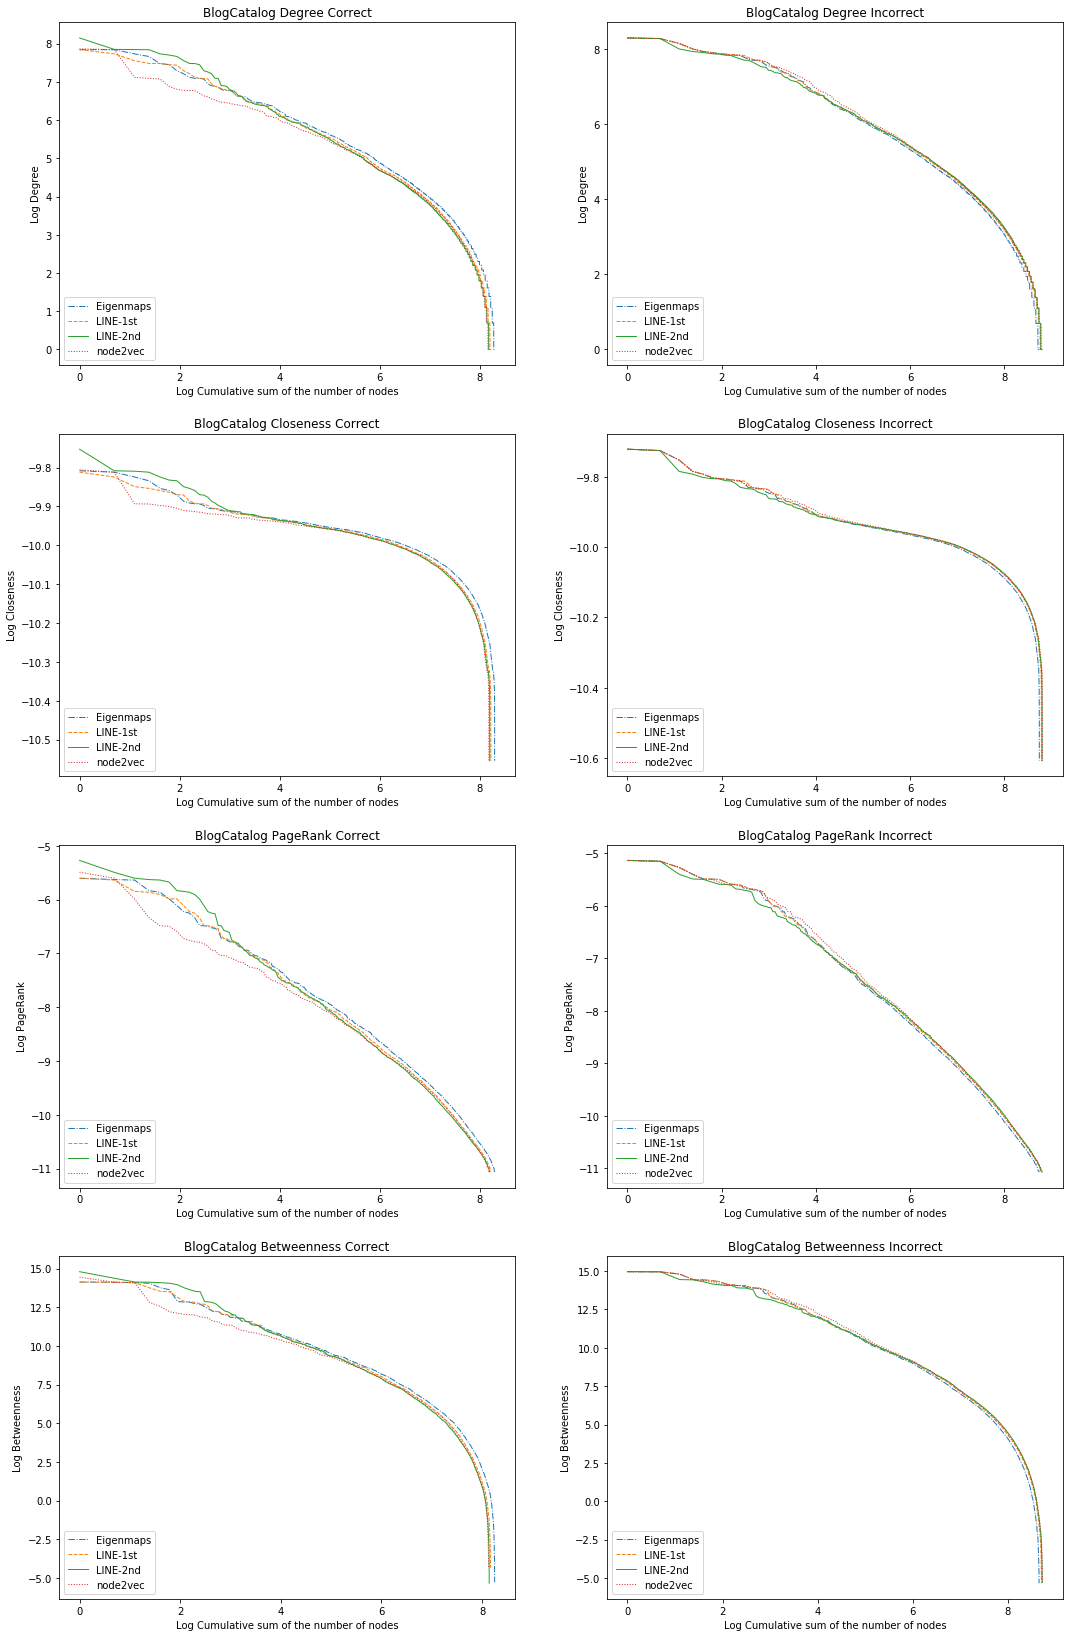

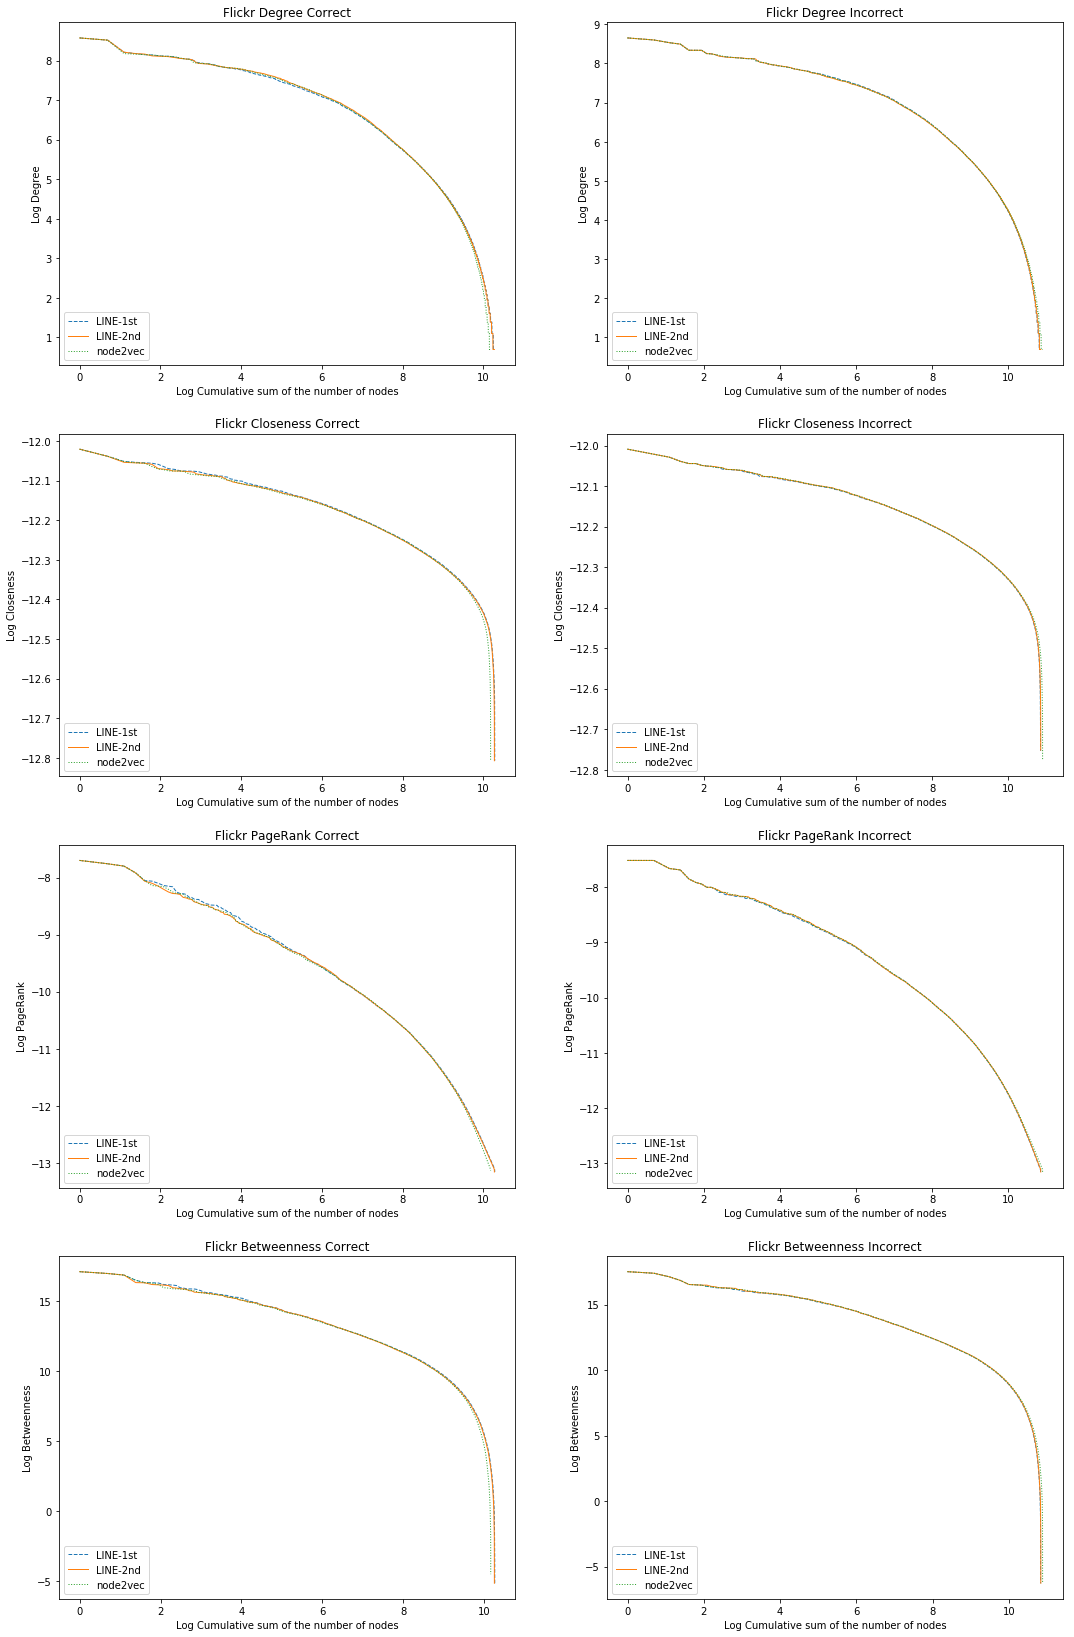

In [4]:
property_names = ['unnormalized_degree', 'unnormalized_closeness', 'pagerank', 'unnormalized_betweenness']
dnames = ['uCora', 'uPubMed', 'BlogCatalog', 'Flickr']
special_dataset_names = ['uCora', 'uPubMed']
for dname in dnames:
    result_df = classification_results[(classification_results['dataset'] == dname)]
    if dname in special_dataset_names:
        data_dir = data_parent_dir + dname[1:] + '/'
        df = pd.read_csv(data_dir + 'node_feature.csv.as_undirected')
    else:
        data_dir = data_parent_dir + dname + '/'
        df = pd.read_csv(data_dir + 'node_feature.csv')

    df.fillna(0., inplace=True)
    num_nodes = len(df)
    fig, axes = plt.subplots(nrows=len(property_names), ncols=2, figsize=(18, 29))

    for r, property_name in enumerate(property_names):
        x = df[property_name].values
        all_values = np.log(x)
        if property_name == 'pagerank':
            property_name = 'PageRank'
        else:
            property_name = property_name.split('_')[1].capitalize()
        
        for _, record in result_df.iterrows():
            param = record['param']
            model = record['model']
            incorrect_nodes = np.array(list(map(int, record['incorrect_ids'].split())))
            correct_nodes = np.array([node_id for node_id in np.arange(num_nodes) if node_id not in incorrect_nodes])

            incorrect_nodes = np.array(list(map(int, record['incorrect_ids'].split())))
            correct_nodes = np.array([node_id for node_id in np.arange(num_nodes) if node_id not in incorrect_nodes])
            correct_and_incorrect_dict = {'Correct': correct_nodes, 'Incorrect': incorrect_nodes}
            
            for c, (label, nodes) in enumerate(correct_and_incorrect_dict.items()):
                x = np.log(np.arange(len(nodes)) + 1)
                y = sorted(all_values[nodes], reverse=True)
                axes[r, c].plot(x, y,
                                label=model,
                                linewidth=1,
                                linestyle=linestyles[model], 
                               )
                axes[r, c].set_title(dname + ' ' + property_name + ' ' + label)
                axes[r, c].set_xlabel('Log Cumulative sum of the number of nodes')
                axes[r, c].set_ylabel('Log {}'.format(property_name))
                axes[r, c].legend(loc=3)
        
    plt.show()
    
    print('\n'*7)


## Plots for our paper

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log2
  if sys.path[0] == '':


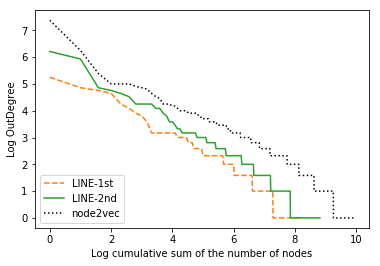

In [5]:
dname = 'Cora'

result_df = classification_results[(classification_results['dataset'] == dname)]
data_dir = data_parent_dir + dname + '/'     

# read node properties
df = pd.read_csv(data_dir + 'node_feature.csv.as_directed')

num_nodes = len(df)
property_name = 'unnormalized_out_degree'
x = df[property_name].values        
all_values = np.log2(x)
property_name = 'OutDegree'

for _, record in result_df.iterrows():
    param = record['param']
    model = record['model']

    incorrect_nodes = np.array(list(map(int, record['incorrect_ids'].split())))
    x = np.log2(np.arange(len(incorrect_nodes)) + 1)
    y = sorted(all_values[incorrect_nodes], reverse=True)
    plt.plot(x, y, label=model, linewidth=1.5, 
                   linestyle=linestyles[model], 
                   color=colors[model]                          
                   )
    plt.xlabel('Log cumulative sum of the number of nodes')
    plt.ylabel('Log {}'.format(property_name))
fig = plt.legend(loc=3)
# plt.savefig('../../../doc/iclrw2018/images/CoraOutDegreeIncorrect.pdf', bbox_inches='tight')

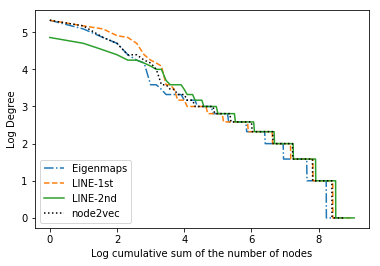

In [6]:
dname = 'uCora'

result_df = classification_results[(classification_results['dataset'] == dname)]

data_dir = data_parent_dir + dname[1:] + '/'
df = pd.read_csv(data_dir + 'node_feature.csv.as_undirected')

num_nodes = len(df)
property_name = 'unnormalized_degree'
x = df[property_name].values        
all_values = np.log2(x)
property_name = 'Degree'

for _, record in result_df.iterrows():
    param = record['param']
    model = record['model']

    incorrect_nodes = np.array(list(map(int, record['incorrect_ids'].split())))
    x = np.log2(np.arange(len(incorrect_nodes)) + 1)
    y = sorted(all_values[incorrect_nodes], reverse=True)
    plt.plot(x, y, label=model, linewidth=1.5, 
                   linestyle=linestyles[model],
                   color=colors[model]             
                   )
    plt.xlabel('Log cumulative sum of the number of nodes')
    plt.ylabel('Log {}'.format(property_name))
fig = plt.legend(loc=3)
# plt.savefig('../../../doc/iclrw2018/images/uCoraDegreeIncorrect.pdf', bbox_inches='tight')